Le Min Max pour jeux de stratégies.

Le principe est simple, mais faut le voir tourner.
Commencons par créer un arbre complet du jeu.

La forme de cet arbre est ici un peu bizarre. Ne vous en préoccupez pas, dites vous simplement que pour une configuration, on peut acceder aux cas suivants.

Vous pouvez sauter directement à la visualisation de l'arbre...


In [ ]:
# Dans cette version jouet
# Un noeud est :
#   - soit une liste [fils1, fils2, ...])
#   - soit une valeur de feuille
#
#  Un mouvement à un niveau est l'indice du fils choisi a ce niveau

def creerArbre():
  racine = []

  # niveau 1
  racine.append([])
  racine.append([])
  racine.append(-3)

  

  # niveau2
  racine[0].append([])
  racine[0].append([])
  racine[1].append([])
  racine[1].append(100)
  

  
  # niveau3
  racine[0][0].append(5)
  racine[0][0].append(2)

  racine[0][1].append(7)
  racine[0][1].append(9)

  racine[1][0].append(-2)
  racine[1][0].append(-4)

  #racine[1][1].append(-1)
  #racine[1][1].append(100)
  

  return racine

racine = creerArbre()
#print (racine)


Le graphe est crée mais on voudrait le voir.
Pour cela, on va utiliser graphviz...

Ne vous préoccupez pas forcément du code de cette fonction

In [ ]:
import graphviz

def visualise2(noeud,parent=None,dot=None,nbNoeuds=0,depth=0):
  #print(noeud)
  if dot==None:
    dot = graphviz.Digraph(comment='mon Graphe')

  nbNoeuds+=1
  currentNb = nbNoeuds

  
  if not isinstance(noeud,list):
    dot.node(str(nbNoeuds), "fin\n"+str(noeud))
  else :
    if depth%2==0:
      dot.node(str(nbNoeuds), 'IA joue')
    else :
      dot.node(str(nbNoeuds), 'ennemi joue')
    
    for f in noeud:
      dot,nbNoeuds = visualise2(f,parent=currentNb,dot=dot,nbNoeuds=nbNoeuds,depth=depth+1)

  if parent:
    dot.edge(str(parent),str(currentNb))

  return dot,nbNoeuds


print("fonction définie...")

fonction définie...


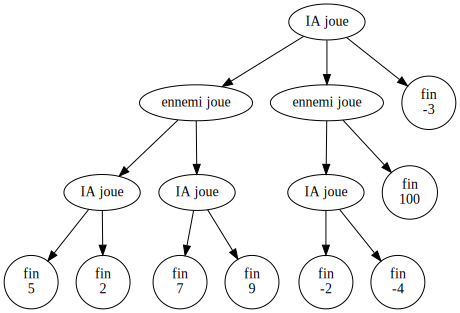

In [ ]:
dot,nb =visualise2(racine)

dot

## Explications de cet arbre

Chaque noeud est une configuration du jeu.
la racine est la situation actuelle, qui dans cet exemple sera jouée par l'IA.

A partir de cette situation, on a 3 choix possibles,
qui seront jouées par l'adversaire
- pour les deux premiers, on ne sait pas encore ce qui va se passer.
- le dernier sommet est une fin de partie (feuille). Sa valeur indique le gain **pour l'IA**. -3 indique donc une défaite de l'IA. Dans un jeu comme Tic Tac Toe, les feuilles ont pour valeur -1, 1 ou 0.

Plus profond dans cet arbre, on retrouve les choix possibles de l'adversaire, puis encore des choix possibles pour l'IA.

J'ai choisi pour cet exemple de ne pas aller plus loin qu'une profondeur de 3. la partie est donc terminée au bout de 3 coups.

## Objectifs et principe du Min Max
Etre capable de choisir parmi les différents fils, lequel conduira vers la meilleure issue pour l'IA.


Pour cela, on va raisonner d'abord sur le cas simple ou l'IA doit jouer en bas a gauche :
- Elle a le choix entre 2 fils.
- Chacun de ses fils est une feuille (donc évaluée)

Ceci nous donne deux infos :
1. l'IA devrait choisir le fils de valeur **max** (5).
2. cette situation est également évaluée : elle prend la valeur du fils max (5)


En faisant ceci sur tout le dernier niveau, on évalue toute la profondeur 3.

Voyons ce qui se passe lorsque l'adversaire joue (à gauche).
il a le choix entre 
- une situation évaluée a 5
- une situation évaluée a 9

Ceci aussi nous donne deux infos:
- S'il joue au mieux, il choisira ce qui **minimise** le gain de l'IA. (5)
- cette situation est également évaluée, elle prend la valeur du fils min (5)

D'ou le nom d'algo **Min Max**

Ceci nous indique aussi que récursivement, l'algo est simple à mettre en oeuvre.





## L'algo

Pour simplifier, je vais créer une variable IA qui vaut 1 si c'est à l'IA de jouer et -1 sinon.

cela me permettre de chercher le max et le min de façon similaire (le min de x1, x2...xn, c'est - le max de -x1,-x2...-xn) 

In [ ]:
import math

def evaluate(noeud, IA=1):
  #print (noeud)
  # Condition de fin : si le noeud est une feuille, on renvoie sa valeur
  if not isinstance(noeud,list):
    return noeud

  # Sinon, on regarde chaque fils.
  bestVal = -math.inf

  for f in noeud:
    val = evaluate (f,IA=-IA)
    if IA*val > bestVal:
      bestVal = IA*val
      # on pourrait conserver aussi le fils qui donne le meilleur choix...
  
  return bestVal*IA
     

In [ ]:
resu  = evaluate(racine)
print ("Voici ce que je peux faire de mieux si mon adversaire est bon :", resu)

Voici ce que je peux faire de mieux si mon adversaire est bon : 5


Ajoutons une petite couche pour choisir quel coup doit jouer l'IA quand on lui pose la question...

In [ ]:
def computeBestStrategy(noeud):
  bestVal = -math.inf
  bestStrategy = -1

  for i in range(len(noeud)) :
    val = evaluate (noeud[i],IA=-1)
    if val > bestVal:
      bestVal = val
      bestStrategy = i
  
  return bestVal, bestStrategy


In [ ]:
resu, prochainCoup  = computeBestStrategy(racine)
print ("je choisis :", prochainCoup, "Ca va me permettre d'obtenir au pire",resu)

je choisis : 0 Ca va me permettre d'obtenir 5


## Conclusion

Voila pour le principe, c'est assez simple.

Notez que le min max garanti le meilleur cas accessible.
Si l'adversaire joue au mieux, on l'atteindra.
S'il joue autrement, il va choisir une situation nécessairement moins bonne pour lui. Quand on évaluera cette nouvelle situation, le résultat ne pourra pas etre pire que ce qu'on avait prédit.


Dans la pratique des jeux :

- on ne construit pas l'arbre au départ. On le découvre au fur et a mesure des appels récursifs.
- il est souvent impossible de parcourir la totalité de l'arbre (qui est trop grand). On stoppe alors la descente à une certaine profondeur. Il faut alors evaluer toutes les pseudo feuilles pour faire remonter l'information. On a recours pour cela à une **heuristique** (dans ce cas, c'est une évaluation approximative).
- il **pourra** être intéressant de regarder comment fonctionne l'élagage alpha béta pour éviter de regarder tous les cas.
- il **sera** très intéressant d'eviter de recalculer toutes les configurations déja vues lors du parcours de l'arbre (dans un jeu, il y a souvent de multiples facon d'arriver à une situation). Il faudrait pour cela mémoriser toutes les configurations croisées et leur évaluation. C'est plus ou moins facile en fonction du jeu. *(attention, une configuration quand c'est à l'IA de jouer n'est pas evaluée de la même façon que quand c'est à l'adversaire de jouer).*


Voila voila.

